In [ ]:
from urlparse import urlparse
from elasticsearch import Elasticsearch
from pandas import DataFrame
import pandas as pd
from ipywidgets import widgets
from ipywidgets import interact
from IPython.display import display

es = Elasticsearch(host="10.11.0.134")
cluster_info = es.search(index="testbulk", body={"size":0,"aggs": {"per_category": {"terms": {"field": "_clusterName"}}}})

cluster_data = cluster_info['aggregations']['per_category']['buckets']
cluster_data
list_clusters = []
for row in cluster_data:
    list_clusters.append(row['key'])
list_clusters
cluster_df = pd.DataFrame(list_clusters, columns=['clusterName'])
cluster_df

In [16]:
cluster_options = widgets.Select(options=list_clusters, value='lab',disabled=False)
display(cluster_options)

In [21]:
%%HTML
<h1> Read the list of hosts for specified cluster.</h1>


In [ ]:
import json
cluster_info = es.search(index="testbulk", body={"size":0, "query": {"bool": {"filter": [{"match": {"_clusterName":cluster_options.value}}]}}, "aggs": {"per_category": {"terms": {"field": "_hostName"}}}})

#host_info = es.search(index="testbulk", size='100', body={"query": {"match_all": {}}})
print 'host info +++> ', json.dumps(host_info)

cluster_data = cluster_info['aggregations']['per_category']['buckets']
print 'host data +++> ', json.dumps(host_data)

host_list = []
for row in cluster_data:
    host_list.append(row['key'])
print 'host list +++> ', host_list

# host_df = pd.DataFrame(list_hosts, columns=['hostName'])
for x_host in host_list:
    host_data = es.search(index="testbulk", body={"size":1, "query": {"bool": {"filter": [{"match": {"_hostName":x_host}}]}}, "aggs": {"per_category": {"terms": {"field": "VMs"}}}})
    print 'host name --->', x_host
    print 'host vm s --->', json.dumps(host_data)

In [25]:
%%HTML
<h1> Read all the hosts</h1>

In [ ]:
all_hosts_info = es.search(index="testbulk", body={"size":0,"aggs": {"per_category": {"terms": {"field": "_hostName"}}}})
all_hosts_info
all_host_data = all_hosts_info['aggregations']['per_category']['buckets']
all_host_data

all_list_hosts = []
for row in all_host_data:
    all_list_hosts.append(row['key'])
all_list_hosts
all_host_df = pd.DataFrame(all_list_hosts, columns=['hostName'])
all_host_df

In [26]:
%%HTML
<h1> Plot the Average RAM Utilization for every host in specified cluster</h1>

          Host        RAM
0   10.11.0.81  12.151363
1   10.11.0.61  38.928932
2  10.11.1.153  29.869044
3  10.11.1.154  45.505097
4  10.11.1.155  41.208480
5          all        NaN


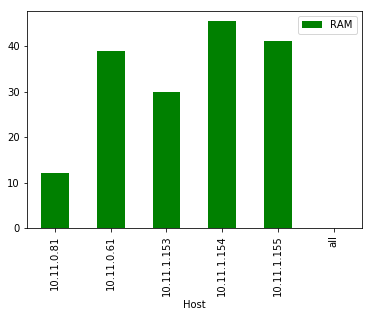

In [42]:
cluster_info = es.search(index="testbulk", body={
"size": 0,
  "aggs": {
    "group_by_state": {
      "terms": {
        "field": "_hostName"
      },
      "aggs": {
        "avg_ram": {
          "avg": {
            "field": "RAMConsumedPercentPeak"
          }
        }
      }
    }
  }
})

# print json.dumps(cluster_info)
ramdata_buckets = cluster_info.get('aggregations', {}).get('group_by_state', {}).get('buckets', [])
# print json.dumps(ramdata_buckets)
data_matrix = []
for x_bucket in ramdata_buckets:
    data_matrix.append([x_bucket.get('key'), x_bucket.get('avg_ram',{}).get('value')])


df = pd.DataFrame(data=data_matrix, columns=['Host', 'RAM'])

% matplotlib inline
df.plot.bar(y="RAM", x="Host", color="green")

In [ ]:
host_options = widgets.Select(options=all_list_hosts, value='10.11.0.81',disabled=False)
display(host_options)

In [ ]:
vm_info = es.search(index="testbulk", body={"size":0, "query": {"bool": {"filter": [{"match": {"_hostName":host_options.value}}]}}, "aggs": {"per_category": {"terms": {"field": "_vmName"}}}})
vm_info
vm_data = vm_info['aggregations']['per_category']['buckets']
vm_data
list_vms = []
for row in vm_data:
    list_vms.append(row['key'])
list_vms
vm_df = pd.DataFrame(list_vms, columns=['vmName'])
vm_df

In [ ]:
all_vms_info = es.search(index="testbulk", body={"size":0,"aggs": {"per_category": {"terms": {"field": "_vmName"}}}})
all_vms_info
all_vm_data = all_vms_info['aggregations']['per_category']['buckets']
all_vm_data
all_list_vms = []
for row in all_vm_data:
    all_list_vms.append(row['key'])
all_list_vms
all_vm_df = pd.DataFrame(all_list_vms, columns=['vmName'])
all_vm_df

In [ ]:
count_clusters = len(list_clusters)
count_hosts = len(all_list_hosts)
count_vms = len(all_list_vms)
vm_count_df = pd.DataFrame([[count_clusters, count_hosts, count_vms]],columns=['Num Clusters', 'Num Hosts', 'Num VMs'])
vm_count_df